In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
housing_data = pd.read_csv("housing.csv")

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data.dropna(inplace=True)
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Separating the labels into a different variable

In [6]:
from sklearn.model_selection import train_test_split
X = housing_data.drop(["median_house_value"],axis = 1)
y = housing_data['median_house_value']

In [7]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [8]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [9]:
#Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3644,-122.16,37.75,35.0,667.0,140.0,406.0,133.0,3.8047,NEAR BAY,94300.0
670,-121.94,37.29,20.0,710.0,188.0,363.0,176.0,4.0962,<1H OCEAN,214100.0
7228,-118.23,33.93,35.0,1149.0,277.0,909.0,214.0,1.7411,<1H OCEAN,96700.0
18857,-118.14,34.70,36.0,1205.0,317.0,678.0,290.0,2.0182,INLAND,98400.0
17475,-117.87,33.88,28.0,2612.0,602.0,1682.0,563.0,3.6417,<1H OCEAN,204300.0
...,...,...,...,...,...,...,...,...,...,...
16377,-118.26,33.95,38.0,1387.0,346.0,1240.0,355.0,1.6898,<1H OCEAN,95100.0
14791,-117.30,34.18,19.0,2526.0,381.0,1176.0,381.0,5.5136,INLAND,137100.0
12357,-118.21,33.88,31.0,1332.0,417.0,1405.0,363.0,2.0125,<1H OCEAN,143000.0
728,-118.10,33.93,35.0,1622.0,302.0,845.0,284.0,4.5769,<1H OCEAN,186100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

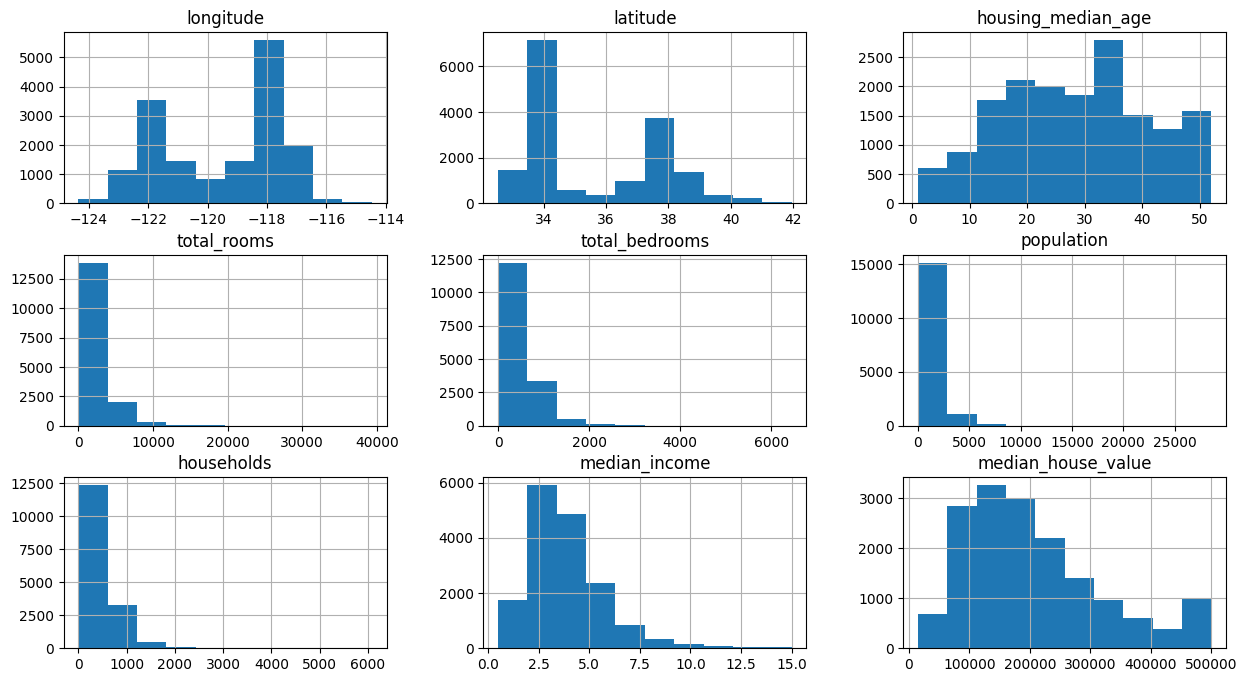

In [11]:
train_data.hist(figsize=(15,8))

Normalizing the data

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

Data after normalization

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

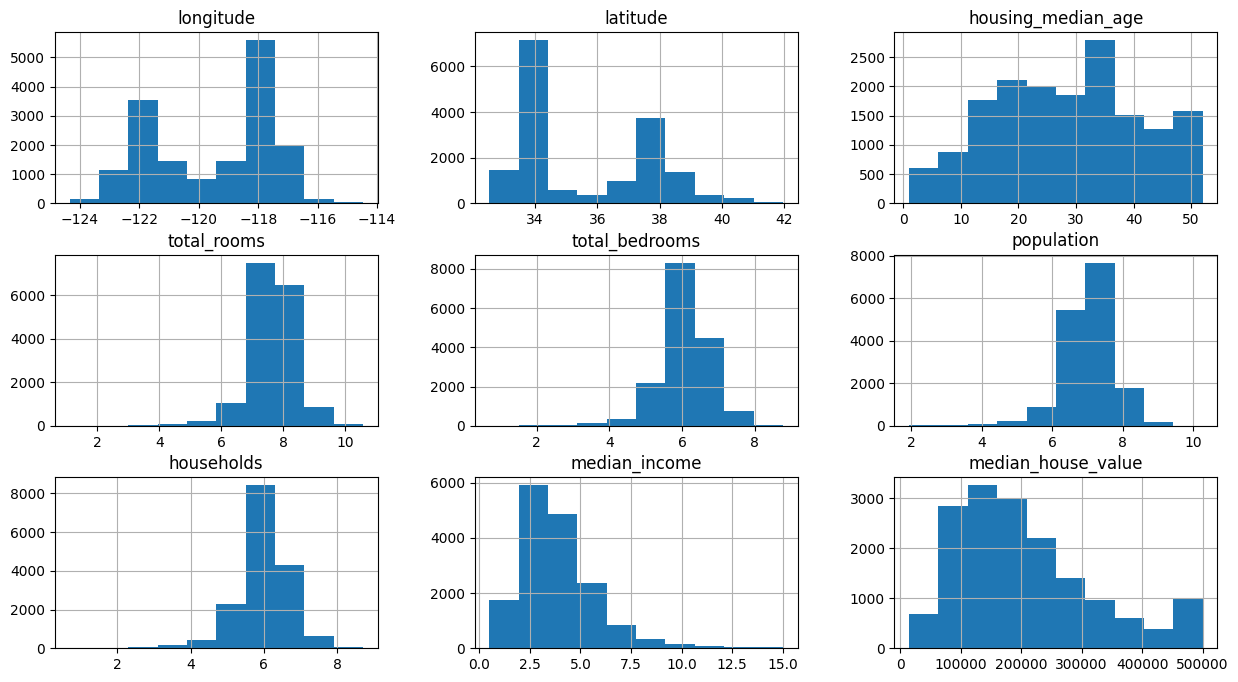

In [13]:
train_data.hist(figsize=(15,8))

In [20]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'],axis= 1)

In [21]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2496,-118.31,33.91,31.0,7.255591,5.828946,6.774224,5.669881,3.8173,177900.0,1,0,0,0,0
14010,-117.20,34.14,14.0,7.881560,6.263398,6.897705,6.173786,3.1513,160000.0,0,1,0,0,0
18845,-117.09,32.71,29.0,7.713785,6.261492,7.631432,6.224558,2.5559,96800.0,0,0,0,0,1
14485,-116.99,33.73,13.0,9.689613,8.153350,8.725832,8.081166,1.9961,97800.0,0,1,0,0,0
4270,-117.34,34.10,14.0,9.378225,7.802209,8.801018,7.740664,2.4878,103800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6551,-120.58,38.77,15.0,7.676010,5.978886,6.754604,5.877736,4.0300,141200.0,0,1,0,0,0
12105,-118.69,34.18,11.0,7.071573,4.934474,6.030685,4.787492,10.0472,500001.0,1,0,0,0,0
11269,-118.03,33.79,26.0,8.579604,6.791221,7.983781,6.799056,5.8914,237600.0,1,0,0,0,0
10198,-122.19,37.79,45.0,7.908019,6.113682,7.009409,6.120297,4.6563,231800.0,0,0,0,1,0


<Axes: >

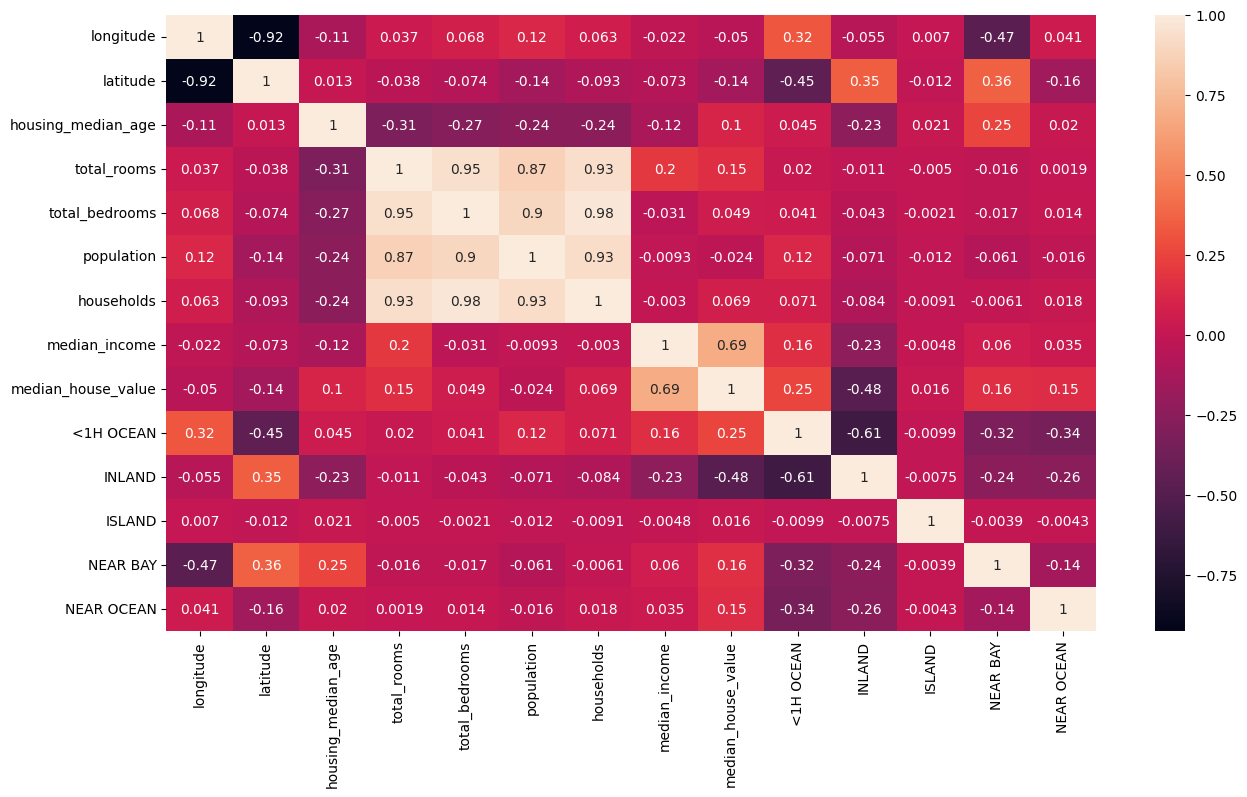

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

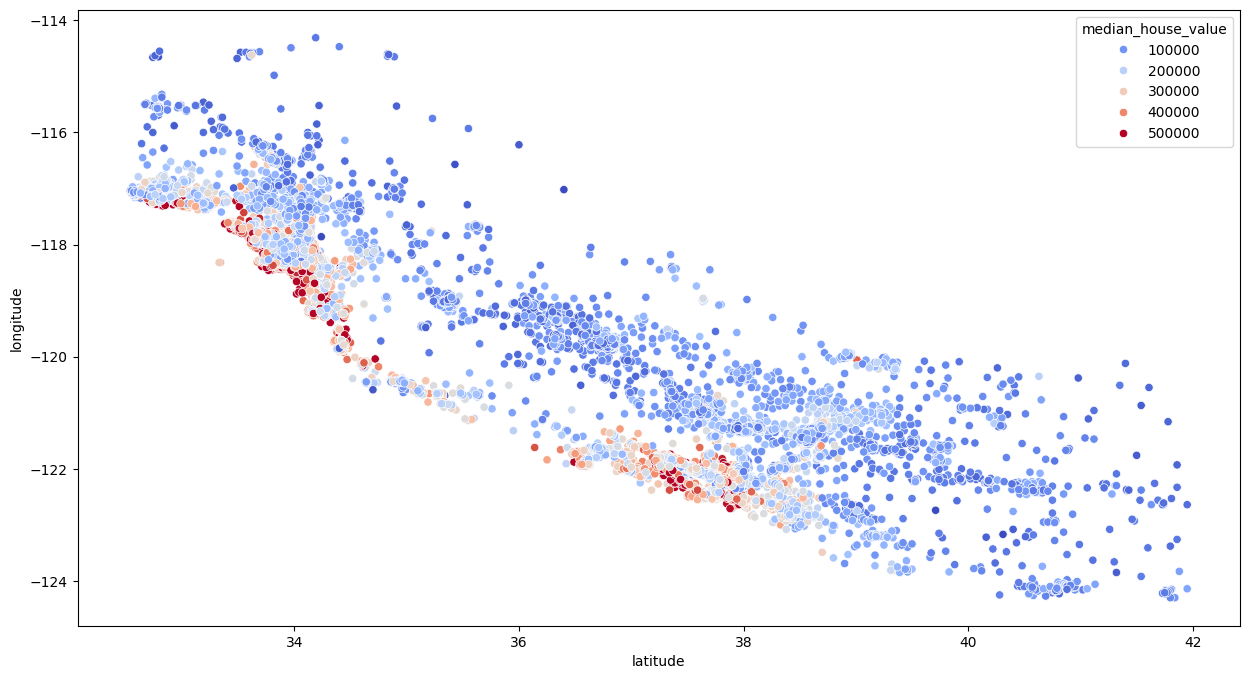

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

Creating extra features

In [24]:
train_data['bedrooms_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

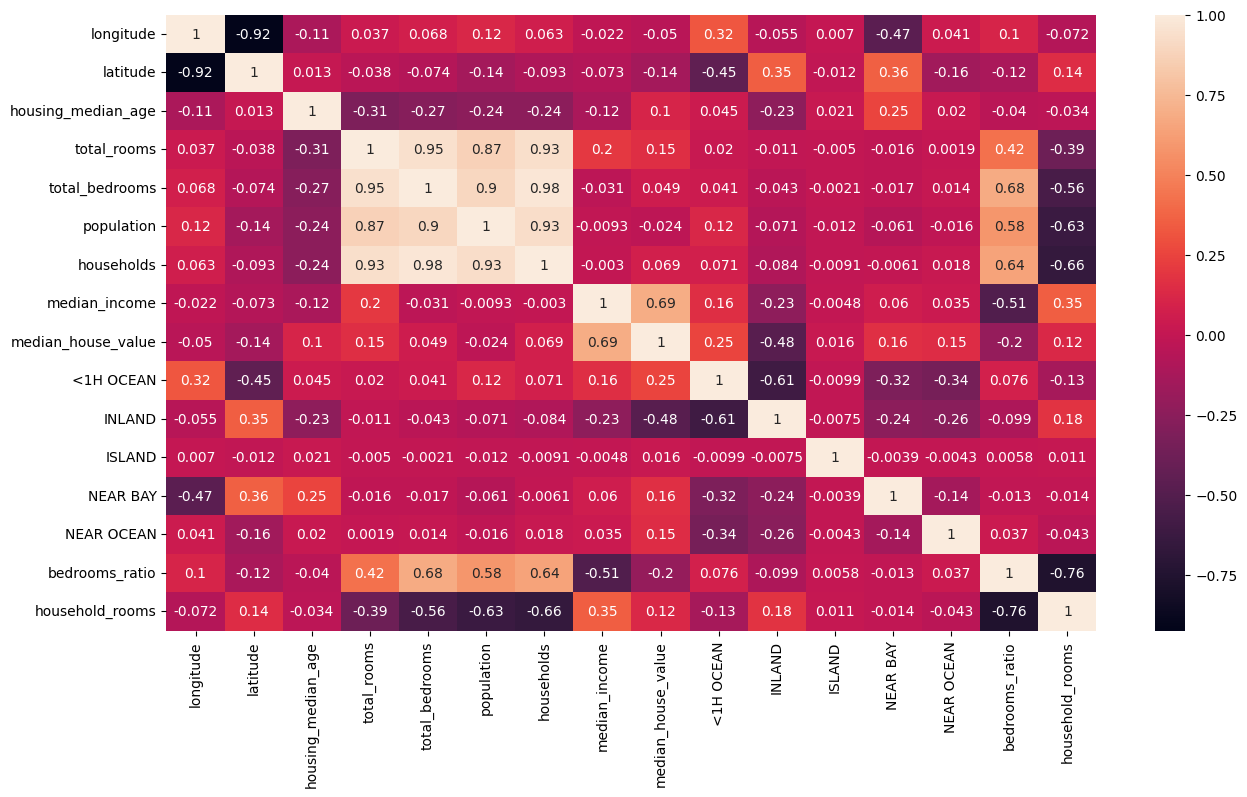

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True)

Applying a Linear regression model first


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, y_train = train_data.drop(['median_house_value'],axis=1) , train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_train_s,y_train)

LinearRegression()

In [27]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'],axis= 1)

test_data['bedrooms_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [28]:
X_test, y_test = test_data.drop(['median_house_value'],axis=1) , test_data['median_house_value']


In [29]:
X_test_s = scaler.transform(X_test)

In [30]:
reg.score(X_test_s,y_test)

0.6702766774422091

#Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s,y_train)

RandomForestRegressor()

In [32]:
forest.score(X_test_s,y_test)

0.8188739715791125

Using RandomizedSeachCV for finding best hyperparameters


In [33]:
from sklearn.model_selection import RandomizedSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[3,10,30],
    "max_features":[2,4,6,8]
}
random_search = RandomizedSearchCV(forest,cv = 3,param_distributions=param_grid,scoring="neg_mean_squared_error",return_train_score=True)
random_search.fit(X_train_s,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': [2, 4, 6, 8],
                                        'n_estimators': [3, 10, 30]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [55]:
best_forest = random_search.best_estimator_

In [57]:
random_search.best_estimator_

RandomForestRegressor(max_features=4)

In [35]:
best_forest.score(X_test_s,y_test)

0.8157103611630501

Randomized search with more values:

In [36]:
from sklearn.model_selection import RandomizedSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[100,200,300],
    "max_features":[2,4],
    "max_depth":[None,4,8]
}
random_search = RandomizedSearchCV(forest,cv = 5,param_distributions=param_grid,scoring="neg_mean_squared_error",return_train_score=True)
random_search.fit(X_train_s,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 4, 8],
                                        'max_features': [2, 4],
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [37]:
random_search.best_estimator_.score(X_test_s,y_test)

0.8134768483181923

***

Creating a pipleline

In [52]:
from sklearn.feature_selection import SelectFromModel


Pipeline with Preprocessing, Selecting best features and applying the random forest regressor


In [61]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("scaler",scaler),
                     ('selector', SelectFromModel(RandomForestRegressor(random_state=42),threshold=0.005)),
                     ("random_forest",best_forest)])

In [62]:
pipeline.fit(X_train_s,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('selector',
                 SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                                 threshold=0.005)),
                ('random_forest', RandomForestRegressor(max_features=4))])

In [63]:
pipeline.score(X_test_s,y_test)

0.8132172333206619

Final Score of model with the pipeline
